In [2]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
files = "C:/Users/zhongj/Desktop/Task3_Data/Data_to_Use" #go to files direction
os.chdir(files)

###### Sites Solar Data

In [4]:
df = pd.read_csv("Chosen_Sites_BTM_Houly.csv")

In [5]:
df=df[df['Month']==7]
df=df[(df['Day']==5)|(df['Day']==6)|(df['Day']==18)]

In [6]:
sites = list(df.columns)
sites.remove('DateTime')
sites.remove('Year')
sites.remove('Month')
sites.remove('Day')
sites.remove('Hour')

In [7]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.index = df['DateTime']
df['Date'] = df['DateTime'].dt.date

In [8]:
date = list(df['Date'].unique())

for p in sites:
    for d in date:
        #choose data: anyday, from  7am to 6pm, values greater that 0
        df_s = df[(df['Date']==d)&(df[p]==0)&(df['Hour']>9)&(df['Hour']<16)]
        
        
        if len(df_s)>3: #if there is data
            df[p].loc[df['Date']==d] = np.nan

C:\Users\zhongj\Zhongj1\ZhongJ\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


###### Sites information

In [9]:
df1= pd.read_excel("Sites_Information.xlsx")
df1.index = df1['Project_ID']
sites2 = list(map(int, sites))
df1 = df1.loc[sites2,:]
df1 = df1.reset_index(drop = True)

In [27]:
## add size column to dataframe

def size_func(x):
    if x <= 250 :
        return 1
    elif x>250 and x<= 1000:
        return 2
    elif x>1000 and x<= 2000:
        return 3
    elif x> 2000 and x<= 3000:
        return 4
    elif x> 3000 and x<= 5000:
        return 5
    else:
        return 6
    
df1['Size'] = df1.apply(lambda x: size_func(x['Total_Capacity']), axis = 1)

In [29]:
# Make 4 bins
def zone_func(x):
    if x == 'A - West' or x == 'B - Genessee' or x == 'C - Central':
        return 1
    elif x == 'D - North' or x == 'E - Mohawk Valley' or x == 'F - Capital':
        return 2
    else:
        return 3


df1['Place'] = df1.apply(lambda x: zone_func(x['NYISO_Zone']), axis = 1)

In [30]:
# Make 4 bins
def size_func(x):
    if x == 'A - West' or x == 'B - Genessee' or x == 'C - Central':
        return 1
    elif x == 'D - North' or x == 'E - Mohawk Valley':
        return 2
    elif x == 'F - Capital' or x == 'G - Hudson Valley':
        return 3
    else:
        return 4

df1['Area'] = df1.apply(lambda x: size_func(x['NYISO_Zone']), axis = 1)

### Per Unit data

In [11]:
for p in sites:
    total_C = df1[df1['Project_ID']== int(p)]['Total_Capacity'].values[0]
    df[p] = df[p]/total_C

In [12]:
for p in sites:
    for d in date:
        df_s = df[(df['Date']==d)][p].values
               
        
        if max(df_s)<0.3: #if there is data
            df[p].loc[df['Date']==d] = np.nan

In [13]:
import math
for p in sites:
    df_s = list(df[p].values)
    if math.isnan(np.mean(df_s)):
        
        del df[p]

In [17]:
writer = pd.ExcelWriter(r'Chosen_Sites_Per_Unit_Solar_Data_in_July.xlsx', 
                                engine = 'xlsxwriter')
df.to_excel(writer)

writer.save()

In [14]:
df3 = df.groupby(['Year', 'Month','Hour']).mean()
df3 = df3.reset_index()
del df3['Day']

In [15]:
            
sites = list(df3.columns)
sites.remove('Year')
sites.remove('Month')
sites.remove('Hour')

In [16]:
df1.index = df1['Project_ID']
sites2 = list(map(int, sites))
df1 = df1.loc[sites2,:]
df1 = df1.reset_index(drop = True)

### Seperate 4 solar dataframe base on size bins

there is no site that has Total_Capacity less than 250

In [20]:
files = "C:/Users/zhongj/Desktop" #go to files direction
os.chdir(files)

In [30]:
id1 = df1[df1['Size']==2]['Project_ID'].values
count1 = len(id1)
id1 = list(map(str, id1))
c1 = ['Hour']
for p in id1:
    c1.append(p)
df_bin1 =  df3[c1]


id2 = df1[df1['Size']==3]['Project_ID'].values
count2 = len(id2)
id2 = list(map(str, id2))
c2 = ['Hour']
for p in id2:
    c2.append(p)
df_bin2 =  df3[c2]



id3 = df1[df1['Size']==4]['Project_ID'].values
count3 = len(id3)
id3 = list(map(str, id3))
c3 = ['Hour']
for p in id3:
    c3.append(p)
df_bin3 =  df3[c3]

id4 = df1[df1['Size']==5]['Project_ID'].values
count4 = len(id4)
id4 = list(map(str, id4))
c4 = ['Hour']
for p in id4:
    c4.append(p)
df_bin4 =  df3[c4]

id5 = df1[df1['Size']==6]['Project_ID'].values
count5 = len(id5)
id5 = list(map(str, id5))
c5 = ['Hour']
for p in id5:
    c5.append(p)
df_bin5 =  df3[c5]



df_bin1['Mean'] = df_bin1[id1].mean(axis=1)

df_bin2['Mean'] = df_bin2[id2].mean(axis=1)

df_bin3['Mean'] = df_bin3[id3].mean(axis=1)

df_bin4['Mean'] = df_bin4[id4].mean(axis=1)

df_bin5['Mean'] = df_bin5[id5].mean(axis=1)

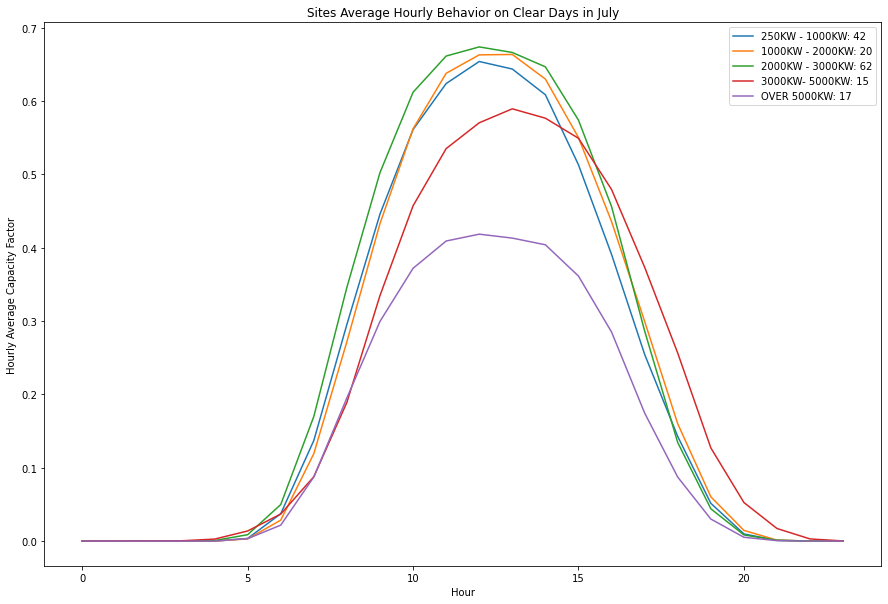

In [32]:
fig, ax = plt.subplots(1,1,figsize = (15,10))
plt.plot(df_bin1['Mean'], label = '250KW - 1000KW: %d'%count1)
plt.plot(df_bin2['Mean'], label = '1000KW - 2000KW: %d'%count2)
plt.plot(df_bin3['Mean'], label = '2000KW - 3000KW: %d'%count3)
plt.plot(df_bin4['Mean'], label = '3000KW- 5000KW: %d'%count4)
plt.plot(df_bin5['Mean'], label = 'OVER 5000KW: %d'%count5)
plt.legend()
plt.ylabel('Hourly Average Capacity Factor')
plt.xlabel('Hour')
plt.title('Sites Average Hourly Behavior on Clear Days in July')
plt.savefig('Sites Average Hourly Behavior 2', bbox_inches="tight")
plt.show()

### Seperate 3 solar dataframe base on their Zone bins

In [45]:
id1 = df1[df1['Place']==1]['Project_ID'].values
id1 = list(map(str, id1))
c1 = ['Hour']
for p in id1:
    c1.append(p)
df_bin1 =  df3[c1]


id2 = df1[df1['Place']==2]['Project_ID'].values
id2 = list(map(str, id2))
c2 = ['Hour']
for p in id2:
    c2.append(p)
df_bin2 =  df3[c2]



id3 = df1[df1['Place']==3]['Project_ID'].values
id3 = list(map(str, id3))
c3 = ['Hour']
for p in id3:
    c3.append(p)
df_bin3 =  df3[c3]


In [46]:
df_bin1['Mean'] = df_bin1[id1].mean(axis=1)


df_bin2['Mean'] = df_bin2[id2].mean(axis=1)

df_bin3['Mean'] = df_bin3[id3].mean(axis=1)

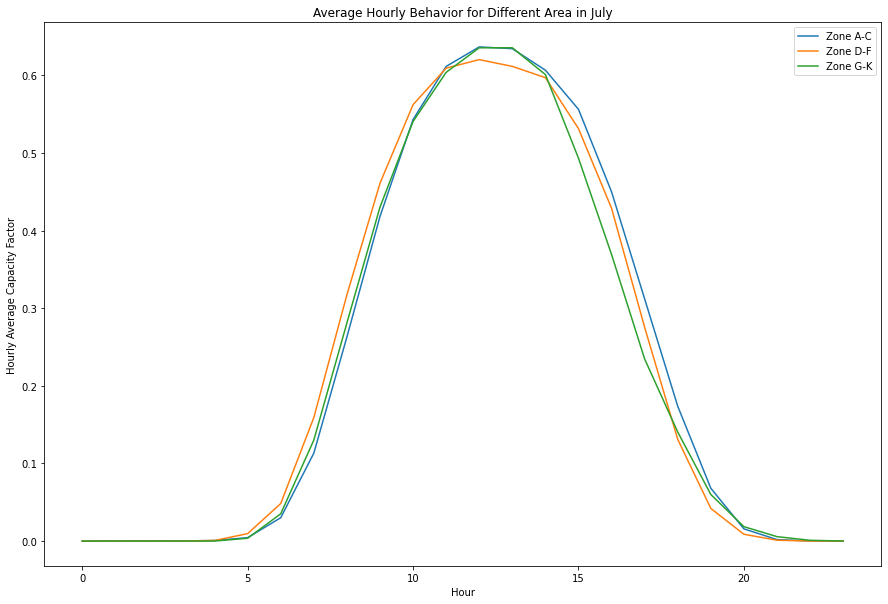

In [47]:
fig, ax = plt.subplots(1,1,figsize = (15,10))
plt.plot(df_bin1['Mean'], label = 'Zone A-C')
plt.plot(df_bin2['Mean'], label = 'Zone D-F')
plt.plot(df_bin3['Mean'], label = 'Zone G-K')
plt.legend()
plt.ylabel('Hourly Average Capacity Factor')
plt.xlabel('Hour')
plt.title('Average Hourly Behavior for Different Area in July')
plt.savefig('Average Hourly Behavior for Different Area in July', bbox_inches="tight")
plt.show()

In [31]:
id1 = df1[df1['Area']==1]['Project_ID'].values
id1 = list(map(str, id1))
c1 = ['Hour']
for p in id1:
    c1.append(p)
df_bin1 =  df3[c1]


id2 = df1[df1['Area']==2]['Project_ID'].values
id2 = list(map(str, id2))
c2 = ['Hour']
for p in id2:
    c2.append(p)
df_bin2 =  df3[c2]



id3 = df1[df1['Area']==3]['Project_ID'].values
id3 = list(map(str, id3))
c3 = ['Hour']
for p in id3:
    c3.append(p)
df_bin3 =  df3[c3]

id4 = df1[df1['Area']==4]['Project_ID'].values
id4 = list(map(str, id4))
c4 = ['Hour']
for p in id4:
    c4.append(p)
df_bin4 =  df3[c4]

In [32]:
df_bin1['Mean'] = df_bin1[id1].mean(axis=1)


df_bin2['Mean'] = df_bin2[id2].mean(axis=1)

df_bin3['Mean'] = df_bin3[id3].mean(axis=1)


df_bin4['Mean'] = df_bin4[id4].mean(axis=1)

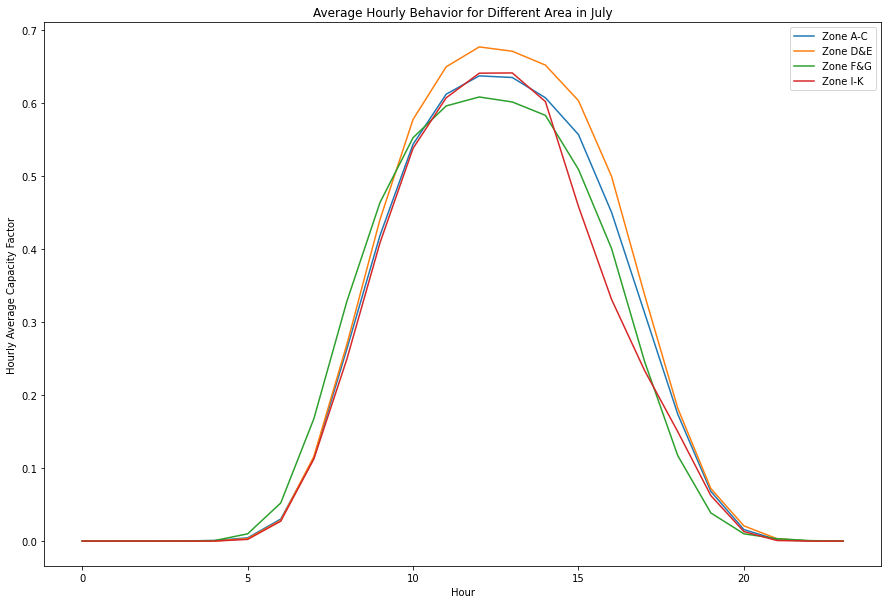

In [34]:
fig, ax = plt.subplots(1,1,figsize = (15,10))
plt.plot(df_bin1['Mean'], label = 'Zone A-C')
plt.plot(df_bin2['Mean'], label = 'Zone D&E')
plt.plot(df_bin3['Mean'], label = 'Zone F&G')
plt.plot(df_bin4['Mean'], label = 'Zone I-K')
plt.legend()
plt.ylabel('Hourly Average Capacity Factor')
plt.xlabel('Hour')
plt.title('Average Hourly Behavior for Different Area in July')
plt.savefig('Average Hourly Behavior for Different Area in July2', bbox_inches="tight")
plt.show()